# 202051211
# Glen Quadros

### Assignment 2

Patient Attendance Data:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jkdf = pd.read_csv('/content/JK-Allopathic-Outpatient_attendance-May-2019.csv')

In [ ]:
jkdf.head()

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5
2,Anantnag,SC,154,10,42,300,2,137,7,0,0
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9


In [ ]:
list(jkdf.columns)

['District',
 'Facility Type',
 'Total No. of Facilities #',
 'No. of facilities reporting nil performance *',
 'Performance - Overall Average **',
 'Performance - Maximum',
 'Performance - Minimum',
 'No. of facilities by performance - 1 to 100',
 'No. of facilities by performance - 101 to 500',
 'No. of facilities by performance - 501 to 1000',
 'No. of facilities by performance - >1000']

In [ ]:
jkdf['Patient Attendance'] = jkdf['Total No. of Facilities #'] * jkdf['Performance - Overall Average **']

In [ ]:
jkdf.head()

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000,Patient Attendance
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2,69656
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5,53370
2,Anantnag,SC,154,10,42,300,2,137,7,0,0,6468
3,Badgam,DH,1,0,23012,23012,23012,0,0,0,1,23012
4,Badgam,CHC,9,0,9446,16828,4151,0,0,0,9,85014


1. Compute total patient attendance for all district for all four range group and plot the bar
diagram. Set the bar plot parameters for better visualization.

In [ ]:
df1 = jkdf.groupby('District')['Patient Attendance'].sum()
df1=df1.to_frame()
df1.reset_index(level=0, inplace=True)
df1

,District,Patient Attendance
0,Anantnag,129494
1,Badgam,116426
2,Bandipora,57685
3,Baramula,179511
4,Doda,47525
5,Ganderbal,57570
6,Jammu,138898
7,Kargil,19072
8,Kathua,83278
9,Kishtwar,31083


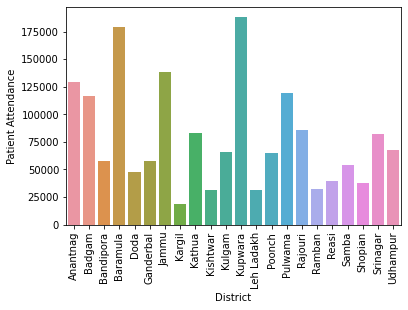

In [ ]:
sns.barplot(data=df1, x='District', y='Patient Attendance')
plt.xticks(rotation=90);

2. Compute total patient attendance for all district for each Facility Type (DH, CHC and SC) for all
four range groups and plot the staked bar diagram of three. Set the bar plot parameters for
better visualization.

In [ ]:
df2 = jkdf.pivot_table('Patient Attendance',index='District',columns='Facility Type')
df2

Facility Type,CHC,DH,SC
District,,,
Anantnag,53370,69656,6468
Badgam,85014,23012,8400
Bandipora,33603,17976,6106
Baramula,100968,52143,26400
Doda,12519,16286,18720
Ganderbal,21781,31323,4466
Jammu,58744,50670,29484
Kargil,4976,8363,5733
Kathua,29406,27943,25929


<Figure size 1080x432 with 0 Axes>

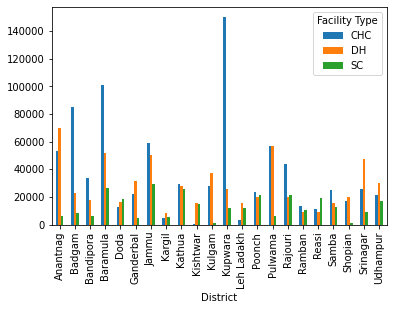

In [ ]:
plt.figure(figsize=(15,6))
df2.plot(kind='bar')

3. Plot group bar plot for Performance - Overall Average of different Facility Type (DH, CHC and
SC) of Anantnag, Jammu, Poonch, Reasi and Udhampur.

In [ ]:
df3 = jkdf[jkdf['District'].isin(['Anantnag', 'Jammu', 'Poonch', 'Reasi', 'Udhampur'])]
df3

,District,Facility Type,Total No. of Facilities #,No. of facilities reporting nil performance *,Performance - Overall Average **,Performance - Maximum,Performance - Minimum,No. of facilities by performance - 1 to 100,No. of facilities by performance - 101 to 500,No. of facilities by performance - 501 to 1000,No. of facilities by performance - >1000,Patient Attendance
0,Anantnag,DH,2,0,34828,41255,28402,0,0,0,2,69656
1,Anantnag,CHC,5,0,10674,16209,5986,0,0,0,5,53370
2,Anantnag,SC,154,10,42,300,2,137,7,0,0,6468
18,Jammu,DH,2,0,25335,35229,15442,0,0,0,2,50670
19,Jammu,CHC,8,0,7343,22694,1195,0,0,0,8,58744
20,Jammu,SC,189,3,156,669,40,48,135,3,0,29484
39,Poonch,DH,1,0,19780,19780,19780,0,0,0,1,19780
40,Poonch,CHC,3,0,7963,9908,4077,0,0,0,3,23889
41,Poonch,SC,148,10,145,311,20,32,106,0,0,21460
51,Reasi,DH,1,0,9236,9236,9236,0,0,0,1,9236


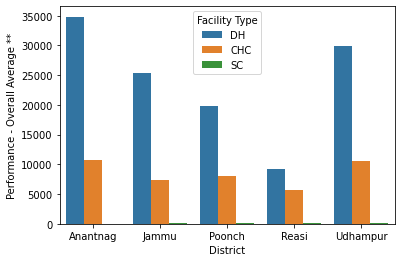

In [ ]:
sns.barplot(data=df3, x='District', y='Performance - Overall Average **', hue='Facility Type')

4. Present dot plot for Performance - Maximum of any 20 different district. Performance - Maximum for different Facility Type should be combined appropriately using a aggregation function
for each district.

In [ ]:
df4 = jkdf.groupby('District')['Performance - Maximum'].max()
df4 = df4.to_frame()
df4 = df4.reset_index()
df4 = df4.head(20)
df4

,District,Performance - Maximum
0,Anantnag,41255
1,Badgam,23012
2,Bandipora,21847
3,Baramula,52143
4,Doda,16286
5,Ganderbal,31323
6,Jammu,35229
7,Kargil,8363
8,Kathua,27943
9,Kishtwar,15691


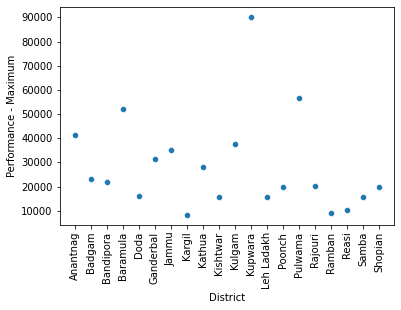

In [ ]:
sns.scatterplot(data=df4, x='District', y='Performance - Maximum')
plt.xticks(rotation=90);

Fifa Player Profile:

In [ ]:
fifadf = pd.read_csv('/content/Fifa_player_football_data.csv')

In [ ]:
fifadf.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
list(fifadf.columns)

['Unnamed: 0',
 'ID',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Real Face',
 'Position',
 'Jersey Number',
 'Joined',
 'Loaned From',
 'Contract Valid Until',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiv

1. Present Age of various football players as histogram and kernel density plots. Set appropriate
parameters of the plot.

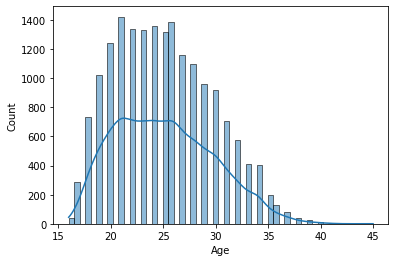

In [ ]:
sns.histplot(data=fifadf, x='Age', kde=True);

2. Present Age of various Football players as Kernel Density plots for each of FC Barcelona,
Chelsea, Juventus and Real Madrid Clubs. Set appropriate parameters of the plot.

In [ ]:
dfr1 = fifadf[fifadf['Club'].isin(['FC Barcelona', 'Chelsea', 'Juventus', 'Real Madrid'])]
dfr1

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14603,14603,245992,B. Gilmour,17,https://cdn.sofifa.org/players/4/19/245992.png,Scotland,https://cdn.sofifa.org/flags/42.png,61,84,Chelsea,...,64.0,41.0,45.0,47.0,9.0,7.0,9.0,13.0,12.0,€1.6M
14646,14646,238075,M. Taylor-Crossdale,18,https://cdn.sofifa.org/players/4/19/238075.png,England,https://cdn.sofifa.org/flags/14.png,61,79,Chelsea,...,56.0,28.0,21.0,17.0,7.0,8.0,8.0,11.0,8.0,€1.3M
15322,15322,241160,G. McEachran,17,https://cdn.sofifa.org/players/4/19/241160.png,England,https://cdn.sofifa.org/flags/14.png,59,81,Chelsea,...,63.0,38.0,55.0,52.0,8.0,14.0,7.0,10.0,5.0,€998K
15846,15846,241159,M. Guehi,17,https://cdn.sofifa.org/players/4/19/241159.png,England,https://cdn.sofifa.org/flags/14.png,58,78,Chelsea,...,40.0,60.0,60.0,59.0,8.0,9.0,11.0,12.0,12.0,€656K


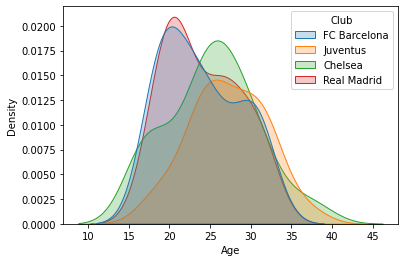

In [ ]:
sns.kdeplot(data=dfr1, x='Age', hue='Club', fill=True)

3. Plot Value of players as Stacked Histogram Preferred Foot wise (right and left).

In [ ]:
fifadf['Value']
fifadf['Player Value'] = fifadf['Value'].replace({'K': '*1e3', 'M': '*1e6','€':''}, regex=True).map(pd.eval).astype(float)

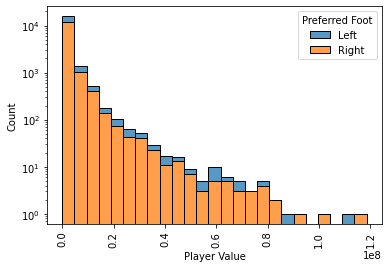

In [ ]:
sns.histplot(data=fifadf, x='Player Value', multiple='stack', hue='Preferred Foot', bins=25)
plt.yscale('log')
plt.xticks(rotation=90);

4. Check distribution of International Reputation using Q-Q plot.

In [ ]:
fifadf['International Reputation']

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18207, dtype: float64

In [ ]:
fifadf['International Reputation'] = fifadf['International Reputation'].fillna(fifadf['International Reputation'].mean())
dfr2 = (fifadf['International Reputation'] - fifadf['International Reputation'].mean())/fifadf['International Reputation'].std()
dfr2

0        9.877178
1        9.877178
2        9.877178
3        7.335953
4        7.335953
           ...   
18202   -0.287723
18203   -0.287723
18204   -0.287723
18205   -0.287723
18206   -0.287723
Name: International Reputation, Length: 18207, dtype: float64

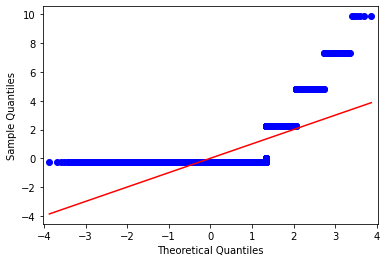

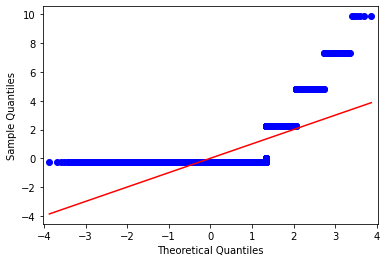

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dfr2, line = 's')